# Regression ML
A regression ensemble model combines multiple individual regression models to make a final prediction. 
Common ensemble techniques for regression include bagging, boosting, and stacking.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
    
# Load the electric dataset(CSV) into a Pandas DataFrame
df_el = pd.read_csv('el_price.csv', sep = ';')
# Select the desired columns
df_el = df_el[['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]']]

# Rename the columns
df_el = df_el.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'price'})

# Extract the first 16 characters from the 'date' column
df_el['date'] = df_el['date'].apply(lambda x: x[0:16])
    
# Interpolate missing values in the 'price' column using linear method
df_el['price'].interpolate(method='linear', inplace=True)

In [13]:
ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=True, freq=None)
train, test = ts.split_after(pd.Timestamp("01.05.2023 01:00"))

In [14]:
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
series_scaled = scaler.transform(ts)

In [19]:
model = RegressionModel(lags=24, model=BayesianRidge()) # we look at past 2 days of the target!

model.fit(train_scaled)

pred = model.predict(
    series = train_scaled,
    n=len(test_scaled),
)

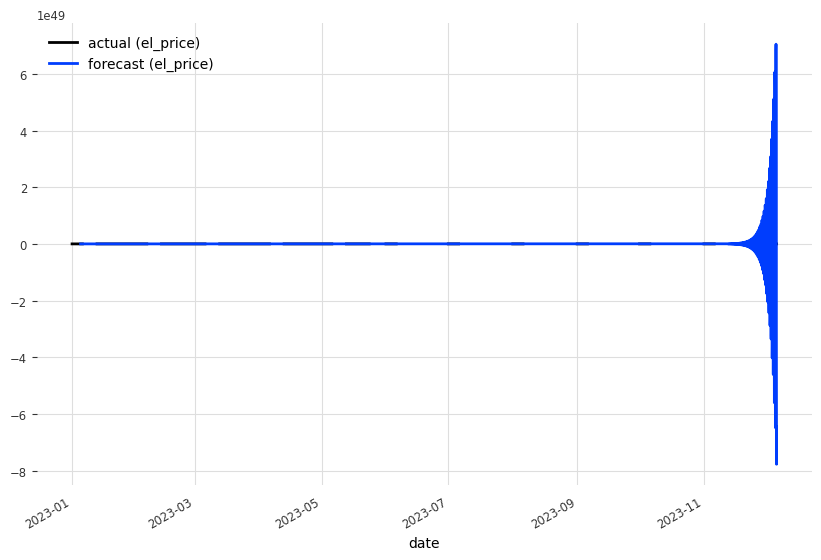

In [20]:
# scale back:
pred = scaler.inverse_transform(pred)

plt.figure(figsize=(10, 6))
ts.plot(label="actual (el_price)")
pred.plot(label="forecast (el_price)")

In [12]:
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=True, freq=None)
train, test = ts.split_after(pd.Timestamp("01.05.2023 01:00"))

scaler = Scaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
series_scaled = scaler.transform(ts)

model = RegressionModel(lags=2400, model=BayesianRidge()) # we look at past 100 days of the target!

model.fit(train_scaled)

pred = model.predict(
    series = train_scaled,
    n=len(test_scaled),
)

# scale back:
pred = scaler.inverse_transform(pred)

plt.figure(figsize=(10, 6))
ts.plot(label="actual (el_price)")
pred.plot(label="forecast (el_price)")

ValueError: Specified series do not share any common times for which features can be created.


ValueError: Specified series do not share any common times for which features can be created.